In [1]:
# !pip install selenium

In [2]:
# !brew install chromedriver

In [7]:
from selenium import webdriver

In [31]:
from selenium.webdriver.chrome.options import Options
opt = Options()
opt.add_argument('--headless')
opt.add_argument('--no-sandbox')
# opt.add_argument('--disable-dev-shm-usage')

In [32]:
from time import sleep

In [33]:
browser = webdriver.Chrome(chrome_options=opt)  # Chromeが起動される！　（browser.quit()で閉じる）

/tmp/ipykernel_15/2369435564.py:1: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(chrome_options=opt)  # Chromeが起動される！　（browser.quit()で閉じる）


In [ ]:
# 都度、最適なドライバーをインストールするパターン（windowsで、うまくいかない時）

# !pip install webdriver_manager
# from webdriver_manager.chrome import ChromeDriverManager
# browser = webdriver.Chrome(ChromeDriverManager().install())

In [13]:
# browser.get('https://www.google.com')

In [17]:
url = 'https://scraping-for-beginner.herokuapp.com/login_page'  # login page
browser.get(url)

In [18]:
elem_username = browser.find_element(by='id', value='username')
elem_username.send_keys('imanishi')

In [19]:
elem_passwd = browser.find_element(by='id', value='password')
elem_passwd.send_keys('kohei')

In [20]:
elem_login_btn = browser.find_element(by='id', value='login-btn')
elem_login_btn.click()

In [21]:
browser.quit()

In [23]:
browser = webdriver.Chrome(chrome_options=opt)
url = 'https://scraping-for-beginner.herokuapp.com/login_page'  # login page
browser.get(url)
sleep(3)

elem_username = browser.find_element(by='id', value='username')
elem_username.send_keys('imanishi')

elem_passwd = browser.find_element(by='id', value='password')
elem_passwd.send_keys('kohei')

sleep(1)
elem_login_btn = browser.find_element(by='id', value='login-btn')
elem_login_btn.click()

/tmp/ipykernel_15/2729648090.py:1: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(chrome_options=opt)


headless mode

In [24]:
from selenium.webdriver.chrome.options import Options

In [27]:
options = Options()
options.add_argument('--headless')

options.add_argument('--no-sandbox')

In [28]:
browser = webdriver.Chrome(options=options)
url = 'https://scraping-for-beginner.herokuapp.com/login_page'  # login page
browser.get(url)

In [29]:
elem_username = browser.find_element(by='id', value='username')
elem_username.send_keys('imanishi')

In [30]:
browser.quit()

# テキストデータの取得

In [34]:
from selenium import webdriver

ログインページにアクセス

In [35]:
browser = webdriver.Chrome(chrome_options=opt)
url = 'https://scraping-for-beginner.herokuapp.com/login_page'
browser.get(url)

/tmp/ipykernel_15/3904377623.py:1: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(chrome_options=opt)


ユーザ名とパスワードを入力

In [36]:
elem_username = browser.find_element(by='id', value='username')
elem_username.send_keys('imanishi')

elem_passwd = browser.find_element(by='id', value='password')
elem_passwd.send_keys('kohei')

ログインボタン

In [37]:
elem_login_btn = browser.find_element(by='id', value='login-btn')
elem_login_btn.click()

text情報の取得

In [38]:
elem = browser.find_element(by='id', value='name')
name = elem.text

In [39]:
elem = browser.find_element(by='id', value='company')
company = elem.text

In [40]:
elem = browser.find_element(by='id', value='birthday')
birthday = elem.text

In [41]:
elem = browser.find_element(by='id', value='come_from')
come_from = elem.text

In [42]:
elem = browser.find_element(by='id', value='hobby')
hobby = elem.text

In [43]:
hobby = hobby.replace('\n', ',')

In [44]:
name, company, birthday, come_from, hobby

('今西 航平', '株式会社キカガク', '1994年7月15日', '千葉県', 'バスケットボール,読書,ガジェット集め')

In [45]:
elem_th = browser.find_element(by='tag name', value='th')

In [46]:
elem_th.text

'講師名'

項目名をまとめて取得

In [47]:
elems_th = browser.find_elements(by='tag name', value='th')

In [48]:
elems_th[2].text

'生年月日'

In [49]:
keys = []
for elem_th in elems_th:
    key = elem_th.text
    keys.append(key)

In [50]:
keys

['講師名', '所属企業', '生年月日', '出身', '趣味']

内容もまとめて取得

In [51]:
elems_td = browser.find_elements(by='tag name', value='td')
values = []
for elem_td in elems_td:
    value = elem_td.text.replace('\n', ',')
    values.append(value)

In [52]:
values

['今西 航平', '株式会社キカガク', '1994年7月15日', '千葉県', 'バスケットボール,読書,ガジェット集め']

In [53]:
import pandas as pd

In [54]:
df=pd.DataFrame()

In [55]:
df['項目'] = keys
df['値'] = values

In [56]:
df

,項目,値
0,講師名,今西 航平
1,所属企業,株式会社キカガク
2,生年月日,1994年7月15日
3,出身,千葉県
4,趣味,"バスケットボール,読書,ガジェット集め"


In [57]:
df.to_csv('講師情報.csv', index=False)

# WEBページ内のテキスト
## Beautiful Soup : htmlの構造解析で用いられる

In [94]:
# !pip install requests

In [ ]:
# !pip install BeautifulSoup4

In [58]:
import requests
from bs4 import BeautifulSoup

In [59]:
url = 'https://scraping-for-beginner.herokuapp.com/udemy'
res = requests.get(url)

In [60]:
res

<Response [200]>

In [61]:
res.text

'<!DOCTYPE html>\n<html lang="en" dir="ltr">\n<head>\n  <meta charset="utf-8">\n  <title>Webスクレイピング入門者のためのサイト</title>\n  <!-- Compiled and minified CSS -->\n  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0-rc.2/css/materialize.min.css">\n  <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"> \x08\n  <link rel="stylesheet" href="static/assets/css/style.css">\n  <link rel="stylesheet" href="static/assets/css/udemy.css">\n  <!-- <link rel="stylesheet" href="static/assets/css/mypage.css"> -->\n</head>\n\n<body>\n  <!-- Navbar -->\n  <div class="navbar-fixed">\n    <!-- Dropdown Structure -->\n    <nav class="">\n      <div class="nav-wrapper row">\n        <div class="col s5 l4 offset-s1 offset-l1">\n          <a href="\x08/" class="brand-logo">Webスクレイピング入門</a>\n        </div>\n        <div class="col s5 l6">\n          <ul id="nav-mobile" class="right hide-on-med-and-down">\n            <li><a href="\x08/login_page" 

見やすく加工

In [62]:
soup = BeautifulSoup(res.text, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Webスクレイピング入門者のためのサイト</title>
<!-- Compiled and minified CSS -->
<link href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0-rc.2/css/materialize.min.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/> 
  <link href="static/assets/css/style.css" rel="stylesheet"/>
<link href="static/assets/css/udemy.css" rel="stylesheet"/>
<!-- <link rel="stylesheet" href="static/assets/css/mypage.css"> -->
</head>
<body>
<!-- Navbar -->
<div class="navbar-fixed">
<!-- Dropdown Structure -->
<nav class="">
<div class="nav-wrapper row">
<div class="col s5 l4 offset-s1 offset-l1">
<a class="brand-logo" href="/">Webスクレイピング入門</a>
</div>
<div class="col s5 l6">
<ul class="right hide-on-med-and-down" id="nav-mobile">
<li><a class="" href="/login_page">ログイン</a></li>
<li><a class="" href="/ranking/">ランキング</a></li>
<li><a class="" href="/image">画像</a></li>
<li>

In [63]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Webスクレイピング入門者のためのサイト
  </title>
  <!-- Compiled and minified CSS -->
  <link href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0-rc.2/css/materialize.min.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
 
  <link href="static/assets/css/style.css" rel="stylesheet"/>
  <link href="static/assets/css/udemy.css" rel="stylesheet"/>
  <!-- <link rel="stylesheet" href="static/assets/css/mypage.css"> -->
 </head>
 <body>
  <!-- Navbar -->
  <div class="navbar-fixed">
   <!-- Dropdown Structure -->
   <nav class="">
    <div class="nav-wrapper row">
     <div class="col s5 l4 offset-s1 offset-l1">
      <a class="brand-logo" href=/">
       Webスクレイピング入門
      </a>
     </div>
     <div class="col s5 l6">
      <ul class="right hide-on-med-and-down" id="nav-mobile">
       <li>
        <a class="" href=/login_page">
         ログイン
  

In [64]:
soup.find_all('p')

[<p>
       こちらのページは、<b>PythonによるWebスクレイピング〜Webアプリケーション編〜</b>で使用します。
       </p>,
 <p><b><p class="position">いまにゅのプログラミング塾｜code4biz 代表</p></b><br/>
 
             『プログラミング×〇〇』でビジネス戦闘力を向上させる｜東京理科大出身｜元東北大学 非常勤講師｜東進デジタルユニバーシティ最年少講師｜AI教育系ベンチャー（キカガク）取締役 → 今｜Udemy受講生3.3万人｜YouTubeチャンネル登録者10.5万人｜プログラミング初学者に欠かせない学習法等を発信<br/>
 </p>,
 <p class="position">いまにゅのプログラミング塾｜code4biz 代表</p>,
 <p class="subscribers">受講生の数：15618</p>,
 <p class="reviews">レビューの数：2667</p>]

In [65]:
soup.find_all('p')[0]

<p>
      こちらのページは、<b>PythonによるWebスクレイピング〜Webアプリケーション編〜</b>で使用します。
      </p>

In [66]:
soup.find('p')

<p>
      こちらのページは、<b>PythonによるWebスクレイピング〜Webアプリケーション編〜</b>で使用します。
      </p>

In [67]:
soup.p

<p>
      こちらのページは、<b>PythonによるWebスクレイピング〜Webアプリケーション編〜</b>で使用します。
      </p>

In [68]:
soup.p.text

'\n      こちらのページは、PythonによるWebスクレイピング〜Webアプリケーション編〜で使用します。\n      '

In [69]:
# 要素名（p）に続いて、属性(attr)を引数(辞書型)で指定

subscribers = soup.find_all('p', attrs={'class': 'subscribers'})[0]
subscribers

<p class="subscribers">受講生の数：15618</p>

In [70]:
subscribers.text

'受講生の数：15618'

In [71]:
n_subscribers = int(subscribers.text.split('：')[1])
n_subscribers

15618

レビューの数を取得

In [72]:
reviews = soup.find_all('p', attrs={'class': 'reviews'})[0]
reviews

<p class="reviews">レビューの数：2667</p>

In [73]:
reviews.text

'レビューの数：2667'

In [74]:
n_reviews = int(reviews.text.split('：')[1])
n_reviews

2667

cssセレクターで指定すいる抽出

In [75]:
soup.select('.subscribers')

[<p class="subscribers">受講生の数：15618</p>]

In [76]:
soup.select_one('.subscribers')  # ひとつ目だけ

<p class="subscribers">受講生の数：15618</p>

In [77]:
soup.select_one('.reviews').text

'レビューの数：2667'

# ランキングサイトの取得

In [78]:
import requests
from bs4 import BeautifulSoup

In [79]:
url = 'https://scraping-for-beginner.herokuapp.com/ranking/'
res = requests.get(url)

In [80]:
res

<Response [200]>

In [81]:
soup = BeautifulSoup(res.text, 'html.parser')

In [82]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Webスクレイピング入門者のためのサイト
  </title>
  <!-- Compiled and minified CSS -->
  <link href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0-rc.2/css/materialize.min.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
 
  <!-- <link rel="stylesheet" href="static/assets/css/style.css">
  <link rel="stylesheet" href="static/assets/css/image.css">
  <link rel="stylesheet" href="static/assets/css/ranking.css"> -->
  <link href="/static/assets/css/style.css" rel="stylesheet"/>
  <link href="/static/assets/css/image.css" rel="stylesheet"/>
  <link href="/static/assets/css/ranking.css" rel="stylesheet"/>
 </head>
 <body>
  <!-- Navbar -->
  <div class="navbar-fixed">
   <!-- Dropdown Structure -->
   <nav class="">
    <div class="nav-wrapper row">
     <div class="col s5 l4 offset-s1 offset-l1">
      <a class="brand-logo" href=/">
       Webス

## 一つの観光地情報を取得

In [83]:
# 観光地名
spots = soup.find_all('div', attrs={'class': 'u_areaListRankingBox'})
spot = spots[0]
spot

<div class="u_areaListRankingBox row">
<div class="u_title col s12">
<p><h2><span class="badge">1</span>観光地 1</h2></p>
</div>
<!-- 観光地イメージ -->
<div class="place_img col s12">
<img alt="" src="/static/assets/img/img1.JPG"/>
</div>
<!-- 総合評価 -->
<div class="u_rankBox col s12">
<span style="--rate: 94.0%;"></span><span class="evaluateNumber">4.7</span><br/>
</div>
<!-- 各カテゴリ評価 -->
<div class="u_categoryTipsItem col s12">
<dl>
<dt>楽しさ</dt>
<dd class="is_rank"><span class="evaluateNumber">4.6</span></dd>
<dd class="comment">一人旅には最適でした</dd>
</dl>
<dl>
<dt>人混みの多さ</dt>
<dd class="is_rank"><span class="evaluateNumber">4.5</span></dd>
<dd class="comment">空いていた</dd>
</dl>
<dl>
<dt>景色</dt>
<dd class="is_rank"><span class="evaluateNumber">4.9</span></dd>
<dd class="comment">目を疑う超絶景であった</dd>
</dl>
<dl>
<dt>アクセス</dt>
<dd class="is_rank"><span class="evaluateNumber">4.2</span></dd>
<dd class="comment">渋滞に巻き込まれて3時間以上かかった</dd>
</dl>
</div>
<div class="divider">
</div>
</div>

In [84]:
spot_name = spot.find('div', attrs={'class': 'u_title'})
spot_name

<div class="u_title col s12">
<p><h2><span class="badge">1</span>観光地 1</h2></p>
</div>

In [85]:
spot_name.text

'\n1観光地 1\n'

In [86]:
spot_name.find('span', attrs={'class': 'badge'})

<span class="badge">1</span>

In [87]:
spot_name.find('span', attrs={'class': 'badge'}).extract()  # 特定したものを取り除く
spot_name

<div class="u_title col s12">
<p><h2>観光地 1</h2></p>
</div>

In [88]:
spot_name = spot_name.text.replace('\n', '')
spot_name

'観光地 1'

In [89]:
# 評価点
eval_num = spot.find('div', attrs={'class', 'u_rankBox'}).text
eval_num = float(eval_num.replace('\n', ''))

In [90]:
eval_num

4.7

In [91]:
categoryItems = spot.find('div', attrs={'class','u_categoryTipsItem'})
categoryItems

<div class="u_categoryTipsItem col s12">
<dl>
<dt>楽しさ</dt>
<dd class="is_rank"><span class="evaluateNumber">4.6</span></dd>
<dd class="comment">一人旅には最適でした</dd>
</dl>
<dl>
<dt>人混みの多さ</dt>
<dd class="is_rank"><span class="evaluateNumber">4.5</span></dd>
<dd class="comment">空いていた</dd>
</dl>
<dl>
<dt>景色</dt>
<dd class="is_rank"><span class="evaluateNumber">4.9</span></dd>
<dd class="comment">目を疑う超絶景であった</dd>
</dl>
<dl>
<dt>アクセス</dt>
<dd class="is_rank"><span class="evaluateNumber">4.2</span></dd>
<dd class="comment">渋滞に巻き込まれて3時間以上かかった</dd>
</dl>
</div>

In [92]:
categoryItems = categoryItems.find_all('dl')
categoryItems

[<dl>
 <dt>楽しさ</dt>
 <dd class="is_rank"><span class="evaluateNumber">4.6</span></dd>
 <dd class="comment">一人旅には最適でした</dd>
 </dl>,
 <dl>
 <dt>人混みの多さ</dt>
 <dd class="is_rank"><span class="evaluateNumber">4.5</span></dd>
 <dd class="comment">空いていた</dd>
 </dl>,
 <dl>
 <dt>景色</dt>
 <dd class="is_rank"><span class="evaluateNumber">4.9</span></dd>
 <dd class="comment">目を疑う超絶景であった</dd>
 </dl>,
 <dl>
 <dt>アクセス</dt>
 <dd class="is_rank"><span class="evaluateNumber">4.2</span></dd>
 <dd class="comment">渋滞に巻き込まれて3時間以上かかった</dd>
 </dl>]

In [93]:
# 楽しさのみ
categoryItem = categoryItems[0]

In [94]:
category = categoryItem.dt.text
category

'楽しさ'

In [95]:
rank = float(categoryItem.span.text)
rank

4.6

全カテゴリーを処理

In [96]:
details = {}

for categoryItem in categoryItems:
    category = categoryItem.dt.text
    rank = float(categoryItem.span.text)

    details[category] = rank


In [97]:
details

{'楽しさ': 4.6, '人混みの多さ': 4.5, '景色': 4.9, 'アクセス': 4.2}

In [98]:
dataum = details
dataum['観光地'] = spot_name
dataum['評価点'] = eval_num

In [99]:
dataum

{'楽しさ': 4.6, '人混みの多さ': 4.5, '景色': 4.9, 'アクセス': 4.2, '観光地': '観光地 1', '評価点': 4.7}

## 全ての観光地情報を取得

In [100]:
soup = BeautifulSoup(res.text, 'html.parser')

data = []  # 全データの格納先

spots = soup.find_all('div', attrs={'class': 'u_areaListRankingBox'})
for spot in spots:
    
    details = {}
    
    # 観光地名
    spot_name = spot.find('div', attrs={'class': 'u_title'})
    spot_name.find('span', attrs={'class': 'badge'}).extract()  # 特定したものを取り除く
    spot_name = spot_name.text.replace('\n', '')
    
    details['観光地'] = spot_name

    # 評価点
    eval_num = spot.find('div', attrs={'class', 'u_rankBox'}).text
    eval_num = float(eval_num.replace('\n', ''))

    details['評価点'] = eval_num
    
    # カテゴリ別の評価
    categoryItems = spot.find('div', attrs={'class','u_categoryTipsItem'})
    categoryItems = categoryItems.find_all('dl')

    for categoryItem in categoryItems:
        category = categoryItem.dt.text
        rank = float(categoryItem.span.text)

        details[category] = rank


    data.append(details)


In [101]:
data

[{'観光地': '観光地 1',
  '評価点': 4.7,
  '楽しさ': 4.6,
  '人混みの多さ': 4.5,
  '景色': 4.9,
  'アクセス': 4.2},
 {'観光地': '観光地 2',
  '評価点': 4.7,
  '楽しさ': 4.6,
  '人混みの多さ': 4.5,
  '景色': 4.9,
  'アクセス': 4.2},
 {'観光地': '観光地 3',
  '評価点': 4.6,
  '楽しさ': 4.5,
  '人混みの多さ': 4.4,
  '景色': 4.8,
  'アクセス': 4.1},
 {'観光地': '観光地 4',
  '評価点': 4.5,
  '楽しさ': 4.4,
  '人混みの多さ': 4.4,
  '景色': 4.8,
  'アクセス': 4.0},
 {'観光地': '観光地 5',
  '評価点': 4.5,
  '楽しさ': 4.4,
  '人混みの多さ': 4.3,
  '景色': 4.7,
  'アクセス': 4.0},
 {'観光地': '観光地 6',
  '評価点': 4.4,
  '楽しさ': 4.3,
  '人混みの多さ': 4.3,
  '景色': 4.7,
  'アクセス': 3.9},
 {'観光地': '観光地 7',
  '評価点': 4.3,
  '楽しさ': 4.2,
  '人混みの多さ': 4.2,
  '景色': 4.6,
  'アクセス': 3.8},
 {'観光地': '観光地 8',
  '評価点': 4.3,
  '楽しさ': 4.2,
  '人混みの多さ': 4.2,
  '景色': 4.6,
  'アクセス': 3.8},
 {'観光地': '観光地 9',
  '評価点': 4.2,
  '楽しさ': 4.1,
  '人混みの多さ': 4.1,
  '景色': 4.5,
  'アクセス': 3.7},
 {'観光地': '観光地 10',
  '評価点': 4.1,
  '楽しさ': 4.0,
  '人混みの多さ': 4.1,
  '景色': 4.4,
  'アクセス': 3.6}]

In [102]:
df = pd.DataFrame(data)

In [103]:
df

,観光地,評価点,楽しさ,人混みの多さ,景色,アクセス
0,観光地 1,4.7,4.6,4.5,4.9,4.2
1,観光地 2,4.7,4.6,4.5,4.9,4.2
2,観光地 3,4.6,4.5,4.4,4.8,4.1
3,観光地 4,4.5,4.4,4.4,4.8,4.0
4,観光地 5,4.5,4.4,4.3,4.7,4.0
5,観光地 6,4.4,4.3,4.3,4.7,3.9
6,観光地 7,4.3,4.2,4.2,4.6,3.8
7,観光地 8,4.3,4.2,4.2,4.6,3.8
8,観光地 9,4.2,4.1,4.1,4.5,3.7
9,観光地 10,4.1,4.0,4.1,4.4,3.6


In [104]:
df.to_csv('観光地情報.csv', index=False)

## 画像の取得＆保存

In [105]:
import requests
from bs4 import BeautifulSoup

In [106]:
url = 'https://scraping-for-beginner.herokuapp.com/image'
res = requests.get(url)

In [107]:
res

<Response [200]>

In [108]:
soup = BeautifulSoup(res.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Webスクレイピング入門者のためのサイト
  </title>
  <!-- Compiled and minified CSS -->
  <link href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0-rc.2/css/materialize.min.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
 
  <link href="static/assets/css/style.css" rel="stylesheet"/>
  <link href="static/assets/css/image.css" rel="stylesheet"/>
 </head>
 <body>
  <!-- Navbar -->
  <div class="navbar-fixed">
   <!-- Dropdown Structure -->
   <nav class="">
    <div class="nav-wrapper row">
     <div class="col s5 l4 offset-s1 offset-l1">
      <a class="brand-logo" href=/">
       Webスクレイピング入門
      </a>
     </div>
     <div class="col s5 l6">
      <ul class="right hide-on-med-and-down" id="nav-mobile">
       <li>
        <a class="" href=/login_page">
         ログイン
        </a>
       </li>
       <li>
        <a class="" href="/ranking/

In [109]:
img_tag = soup.find('img')
img_tag['src']

'/static/assets/img/img1.JPG'

In [110]:
root_url = 'https://scraping-for-beginner.herokuapp.com'
img_url = root_url + img_tag['src']

img_url

'https://scraping-for-beginner.herokuapp.com/static/assets/img/img1.JPG'

In [112]:
from PIL import Image
import io

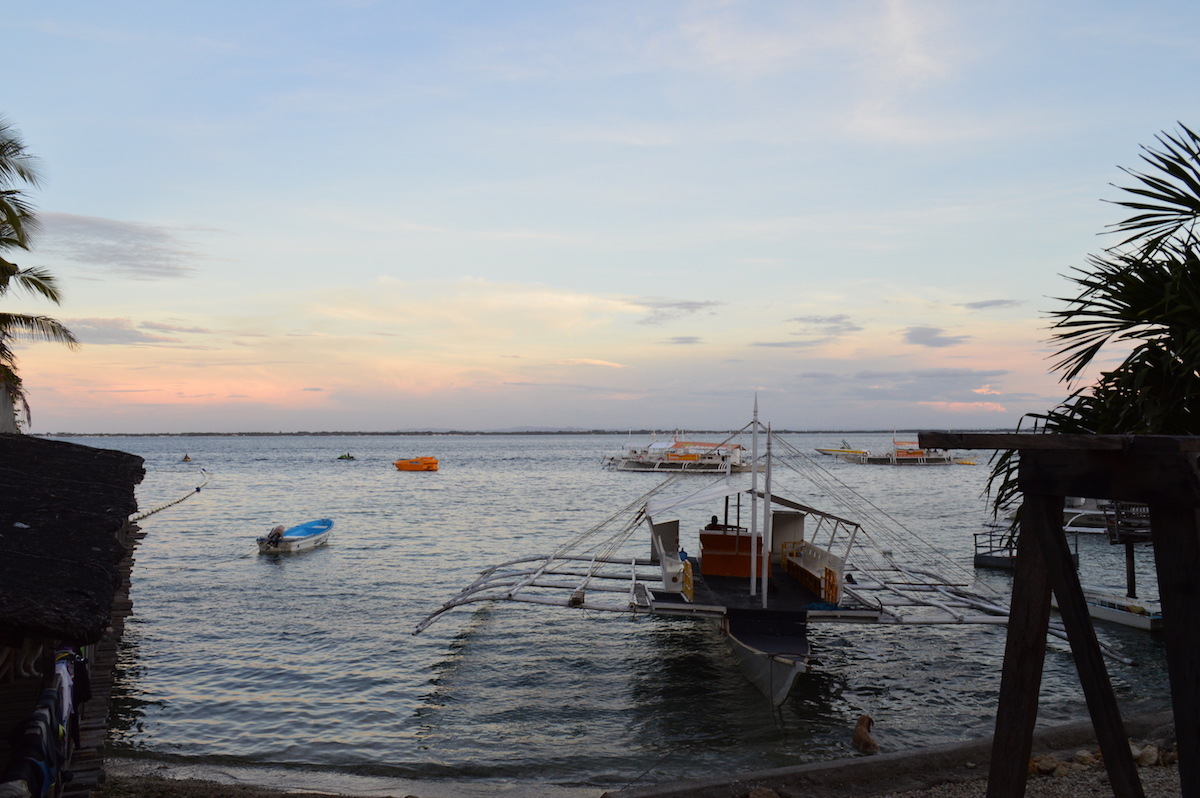

In [113]:
img = Image.open(io.BytesIO(requests.get(img_url).content))
img

In [114]:
img.save('img/sample.jpg')

In [115]:
# soup = BeautifulSoup(res.text, 'html.parser')
# img_tag = soup.find('img')

# root_url = 'https://scraping-for-beginner.herokuapp.com'
# img_url = root_url + img_tag['src']

# img = Image.open(io.BytesIO(requests.get(img_url).content))
# img.save('img/sample.jpg')



In [116]:
soup = BeautifulSoup(res.text, 'html.parser')

img_tags = soup.find_all('img')
for i, img_tag in enumerate(img_tags):
    
    root_url = 'https://scraping-for-beginner.herokuapp.com'
    img_url = root_url + img_tag['src']

    img = Image.open(io.BytesIO(requests.get(img_url).content))
    
    if i<5 :
        img.save(f'img/sample{i}.jpg')